# Setup

In [ ]:
from pylab import *
from numpy import *
from scipy.signal import lfilter

pars = {}
pars['Tfilt'] = 100 # length of filter in ms
pars['dt'] = 0.1 # timestep in ms/step
pars['Tlong']=5000 # length of long injections in ms
pars['range_t'] = np.arange(0, pars['Tlong'], pars['dt'])

def DesignExponentialFilter(pars,tau):
  t = arange(0,pars['Tfilt'],pars['dt'])
  IRF_filter = exp(-t/tau)
  IRF_filter = IRF_filter/sum(IRF_filter)
  IRF_filter[0]=0
  return IRF_filter,t

def sigmoid(x):
  y = 1/(1+exp(-x))
  return y

def my_GWN(pars, mu, sig, myseed=False):
  """
  Function that generates Gaussian white noise input

  Args:
    pars       : parameter dictionary
    mu         : noise baseline (mean)
    sig        : noise amplitute (standard deviation)
    myseed     : random seed. int or boolean
                 the same seed will give the same
                 random number sequence

  Returns:
    I          : Gaussian white noise input
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size

  # set random seed
  # you can fix the seed of the random number generator so that the results
  # are reliable however, when you want to generate multiple realization
  # make sure that you change the seed for each new realization.
  if myseed:
      np.random.seed(seed=myseed)
  else:
      np.random.seed()

  # generate GWN
  # we divide here by 1000 to convert units to sec.
  I_gwn = mu + sig * np.random.randn(Lt) / np.sqrt(dt / 1000.)

  return I_gwn


# Linear-Nonlinear Model

We consider a linear-nonlinear model for converting the net input to a given compartment, $I$ to a local membrane potential $V_d$
$$
V_d(t) = f(\kappa_1 \ast I_d) + \kappa_2 \ast I_d
$$

When considering interactions with the soma, we will have 
$$
V_d(t) = f(\kappa_1 \ast (I_d+S)) + \kappa_2 \ast (I_d + S)
$$
where S is the somatic spike train (potentially a dirac-delta train filtered by a rectangular function). For a passive propagation to soma we would have:
$$ V_s(t) = \kappa_s\ast Is + \kappa_{sd}\ast V_d$$
with a threshold condition on $V_s$ for somatic spikes.

# 1. Sodium spikes

## 1.1 Noisy stimulation

Filter choice

Text(0, 0.5, 'Dendritic Membrane IRF $\\kappa_2$ [kHz/pA]')

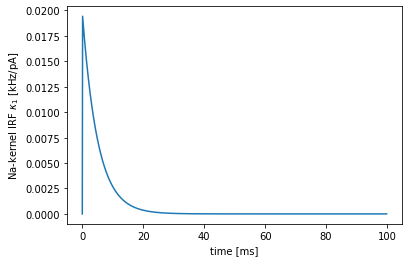

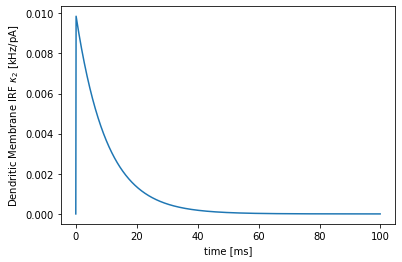

In [ ]:
tauNa = 5 # filter for sodium spikes
NaFilter,tfilt = DesignExponentialFilter(pars,tauNa)
plot(tfilt,NaFilter)
xlabel('time [ms]')
ylabel('Na-kernel IRF $\kappa_1$ [kHz/pA]')

figure()
tauDmem = 10 # filter for sodium spikes
DMemFilter,tfilt = DesignExponentialFilter(pars,tauDmem)
plot(tfilt,DMemFilter)
xlabel('time [ms]')
ylabel('Dendritic Membrane IRF $\kappa_2$ [kHz/pA]')

Input Gaussian White Noise

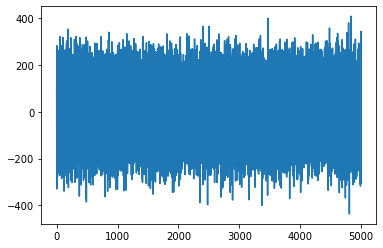

In [ ]:
I = my_GWN(pars, 0, 1, myseed=False)
plot(pars['range_t'],I)


Text(0, 0.5, '$V_d$ [mV]')

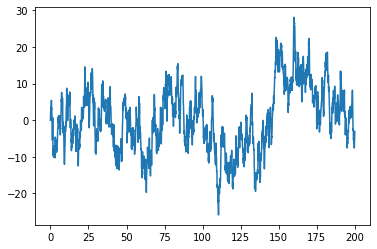

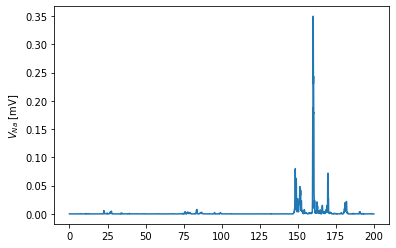

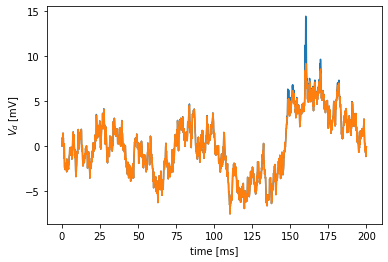

In [ ]:

INa_pre = lfilter(NaFilter, 1, I, axis=- 1, zi=None)
plot(pars['range_t'][:2000],INa_pre[:2000])

NL_baseline = 30
NL_sensit = 3
NL_scale = 15.0

VNa = sigmoid((INa_pre-NL_baseline)/NL_sensit)
figure()
plot(pars['range_t'][:2000],VNa[:2000])
ylabel('$V_{Na}$ [mV]')

VL = lfilter(DMemFilter, 1, I, axis=- 1, zi=None)/2
Vd = VL + VNa*NL_scale
figure()
plot(pars['range_t'][:2000],Vd[:2000])
plot(pars['range_t'][:2000],VL[:2000])
xlabel('time [ms]')
ylabel('$V_d$ [mV]')


Now look at dependence on mean input

## 1.2 EPSC train

Simulating EPSC train as in Magee papers

## 1.3 Interactions with soma
As in Golding paper

# 2 Ca spikes

Extend filter timescale to capture Ca spikes

## 2.1 Noisy stimulation

As in Larkum et a. 2006


## 2.2 EPSC trains

Hmm, I actually dont know of any papers eliciting Ca spikes with EPSC trains in dendrites only... maybe skip for now?

## 2.3 Interaction with soma

Capture Larkum et al. 1999 (Nature)

# 3 NMDA spikes

Even longer timescale

## 3.1 Noisy stimulation

Hmm, I dont know which experimental paper did NMDA and noisy stim. But there must be something.

## 3.2 EPSC trains

Major model figures and Schiller paper (s)

## 3.3 Interaction with soma
I dont think there is any experiments on this, but could be good to explore by modeling for symmetry

# 4 Interaction among dendritic spikes

Expose some features of Parallel information processing, as in the Ujfalussy et al. model

# 4.1 Na and Ca spikes

## 4.2 Na and NMDA spikes
